# 1. Introduction

Logging is a means of tracking events that happen when some software runs. It is important for software developing, debugging, and running.

If you don’t have any logging record and your program crashes, there are very few chances that you detect the cause of the problem. And if you detect the cause, it will consume a lot of time. With logging, you can leave a trail of breadcrumbs so that if something goes wrong, we can determine the cause of the problem. 

There are several situations, like if you are expecting an integer, you have been given a float, the service is down for maintenance, and much more. These problems are hard to determine and time-consuming.

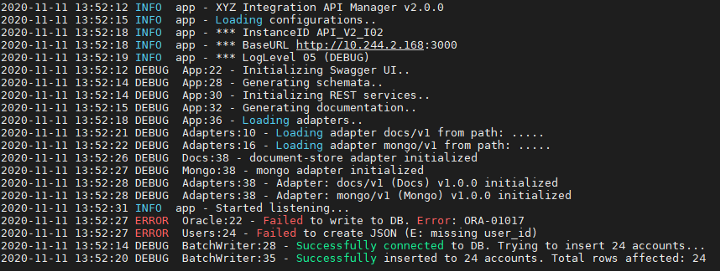

# 2. Why Printing is Not a Good Option?

When you run a python script, you want to know what part of the script is getting executed and inspect what values the variables hold. Usually, you may just print out meaningful messages so you can see them in the console. And this is probably all you need when you are developing small programs.

The problem is, when you use this approach on larger projects with multiple modules, you want a more flexible approach. Because the code could go through different stages as in development, debugging, review, testing or in production.

The type of messages you want to print out during development can be very different from want you to see once it goes into production. Depending on the purpose, you want the code to print out different types of messages.

This can get cumbersome with if-else and print statements. Besides, you want a certain hierarchy when it comes to printing messages. What I mean by that is, during a certain ‘testing’ run, you want to see only warnings and error messages. Whereas during ‘debugging’, you not only want to see the warnings and error messages but also the debugging-related messages. Imagine doing this with ‘if else‘ statements on a multi-module project.

If you want to print out which module and at what time the codes were run, your code could easily get messier.

There is good news. All these issues are nicely addressed by the logging module.

Using logging, you can:

- Control message level to log only required ones.
- Control where to show or save the logs.
- Control how to format the logs with built-in message templates.
- Know which module the messages are coming from.

# 3. Basic Example

Python provides an in-built logging module, which is part of the python standard library. So you don’t need to install anything.

To use logging, all we need to do is set up the basic configuration using logging.basicConfig(). Actually, this is also optional. We will see about that soon. Then, instead of print(), you call logging.{level}(message) to show the message in the console.

In [5]:
import logging as lg

lg.basicConfig(level=lg.INFO)

def sum(a, b):
    """Compute the sum"""
    return a+b

lg.info("Sum of {0}, {1} is {2}".format(3,4,sum(3,4)))

INFO:root:Sum of 3, 4 is 7


The printed log message has the following default format: {LEVEL}:{LOGGER}:{MESSAGE}.

In the above case, the level is info, because we called logging.info(). The logger is called root, because that is the default logger, and we did not create a new one, yet.

**But what is a Logger anyway?**

A logger is like an entity we can create and configure to log different type and format of messages. We can configure a logger that prints to the console and another logger that sends the logs to a file, has a different logging level and is specific to a given module.

Finally, the message is the string we passed to logging.info(). Now, what would have happened had we not setup logging.basicConfig(level=logging.INFO)?

**Answer:** The log would not have been printed. Why? To know that, let’s understand the levels of logging.

# 4. Five Levels of Logging

Logging has 5 different hierarchical levels of logs that a given logger may be configured to. Let’s see what the python docs have to say about each level:

- **DEBUG:** Detailed information for diagnosing problems. Value=10.
- **INFO:** Confirm things are working as expected. Value=20.
- **WARNING:** Something unexpected happened, or indicative of some problem. But the software is still working as expected. Value=30.
- **ERROR:** More serious problem, the software is not able to perform some function. Value=40
- **CRITICAL:** A serious error, the program itself may be unable to continue running. Value=50

If required, developers have the option to create more levels, but these are sufficient to handle every possible situation. Each built-in level has been assigned its numeric value.

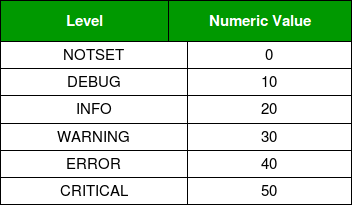

The logging module is packed with several features. It has several constants, classes, and methods. The items with all caps are constant, the capitalize items are classes and the items which start with lowercase letters are methods. 

There are several logger objects offered by the module itself.  

- **Logger.info(msg):** This will log a message with level INFO on this logger.

- **Logger.warning(msg):** This will log a message with a level WARNING on this logger.

- **Logger.error(msg):** This will log a message with level ERROR on this logger.

- **Logger.critical(msg):** This will log a message with level CRITICAL on this logger.

- **Logger.log(lvl,msg):** This will log a message with integer level lvl on this logger.

- **Logger.exception(msg):** This will log a message with level ERROR on this logger.

- **Logger.setLevel(lvl):** This function sets the threshold of this logger to lvl. This means that all the messages below this level will be ignored.

- **Logger.addFilter(filt):** This adds a specific filter filt into this logger.

- **Logger.removeFilter(filt):** This removes a specific filter filt into this logger.

- **Logger.filter(record):** This method applies the logger’s filter to the record provided and returns True if the record is to be processed. Else, it will return False.

- **Logger.addHandler(hdlr):** This adds a specific handler hdlr to this logger.

- **Logger.removeHandler(hdlr):** This removes a specific handler hdlr into this logger.

- **Logger.hasHandlers():** This checks if the logger has any handler configured or not. 

Now, coming back to the previous question of what would have happened had you not setup logging.basicConfig(level=logging.INFO) in the previous example.

The answer is: the log would not have been printed because **the default logger is the ‘root’ and its default basicConfig level is ‘WARNING’**. That means only messages from logging.warning() and higher levels will get logged.

So, the message of logging.info() would not be printed. And that is why the basic config was set as INFO initially (in logging.basicConfig(level=logging.INFO)).

Had I set the level as logging.ERROR instead, only message from logging.error and logging.critical will be logged. Clear?

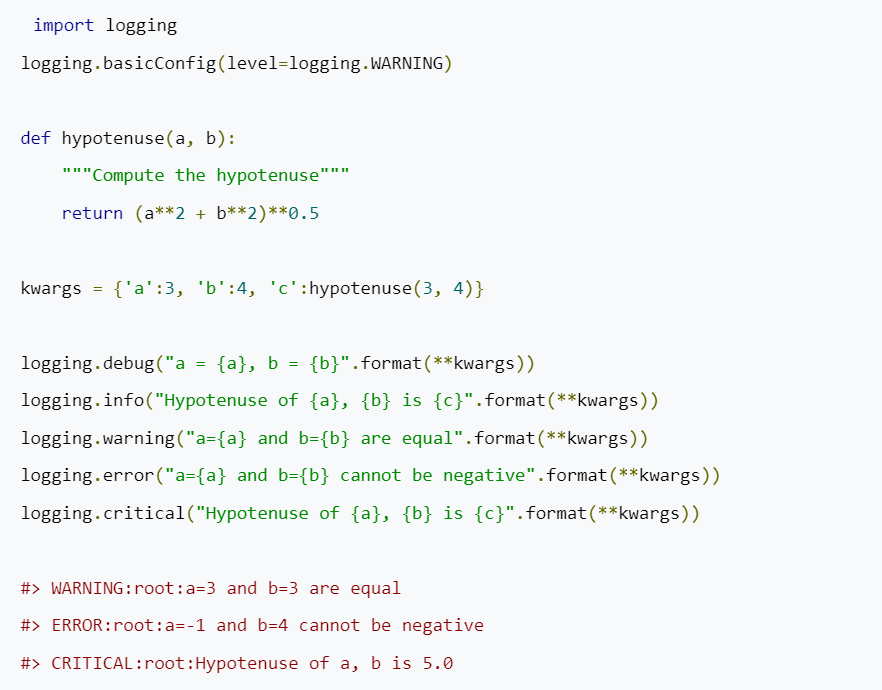

# 5. Logging to File Instead of Console

To send the log messages to a file from the root logger, you need to set the file argument in logging.basicConfig().

In [ ]:
import logging
logging.basicConfig(level=logging.INFO, file='sample.log')

Now all subsequent log messages will go straight to the file ‘sample.log’ in your current working directory. If you want to send it to a file in a different directory, give the full file path.

# 6. Changing The Logging Format

The logging module provides shorthands to add various details to the logged messages. The below image from Python docs shows that list.

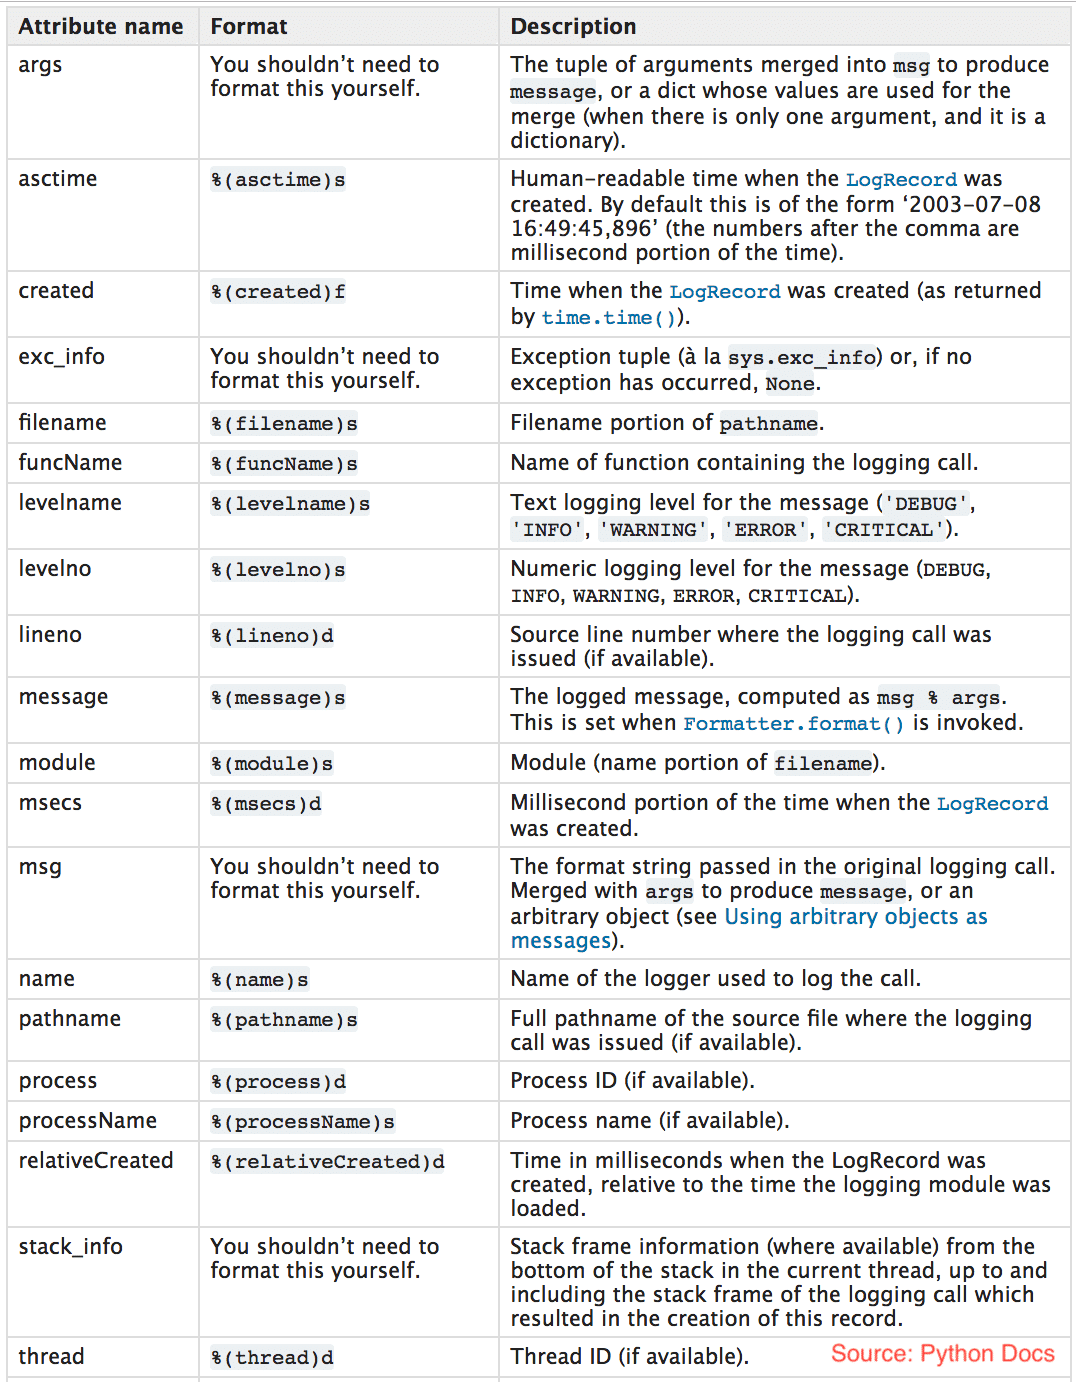

Let’s change the log message format to show the TIME, LEVEL and the MESSAGE. To do that, just add the format to logging.basiconfig()‘s format argument.

In [ ]:
import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s :: %(levelname)s :: %(message)s')
logging.info("Just like that!")
#> 2019-02-17 11:40:38,254 :: INFO :: Just like that!

# 7. Why Working with the Root Logger for All Modules Isn’t the Best Idea?

Because they all will share the same ‘root’ logger. But why is that bad? Let’s look at the below code:

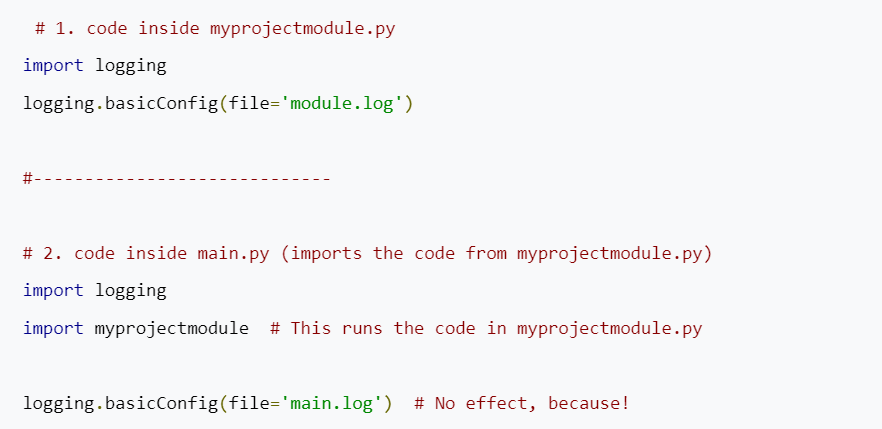

Imagine you have one or more modules in your project. And these modules use the basic root module. Then, when importing the module (‘myprojectmodule.py‘), all of that module’s code will run and logger gets configured.

Once configured, the root logger in the main file (that imported the ‘myprojectmodule‘ module) will no longer be able to change the root logger settings. **Because, the logging.basicConfig() once set cannot be changed**.

That means, if you want to log the messages from myprojectmodule to one file and the logs from the main module in another file, the root logger can’t do that. To do that, you need to create a new logger.

# 8. Creating New Logger

You can create a new logger using the ‘logger.getLogger(name)‘ method. If a logger with the same name exists, then that logger will be used.

While you can give pretty much any name to the logger, the convention is to use the __name__ variable like this:

In [ ]:
logger = logging.getLogger(__name__)
logger.info('my logging message')

But, why use __name__ as the name of the logger, instead of hard-coding a name? Because the __name__ variable will hold the name of the module (python file) that called the code. So, when used inside a module, it will create a logger bearing the value provided by the module’s __name__ attribute.

By doing this, if you end up changing the module name (file name) in the future, you don’t have to modify the internal code.

Now, once you’ve created a new logger, you should remember to log all your messages using the new logger.info() instead of the root’s logging.info() method. Another aspect to note is, all the loggers have a built-in hierarchy to it. What do I mean by that?

For example, if you have configured the root logger to log messages to a particular file. You also have a custom logger for which you have not configured the file handler to send messages to console or another log file.

In this case, the custom logger will fallback and write to the file set by the root logger itself. Until and unless you configure the log file of your custom logger.

So what is a file handler and how to set one up?

# 9. Seting Up a File Handler & Formatter

The FileHandler() and Formatter() classes are used to setup the output file and the format of messages for loggers other than the root logger. Do you remember how we setup the filename and the format of the message in the root logger (inside logging.basicConfig()) earlier?

We just specified the filename and format parameters in logging.basicConfig() and all subsequent logs went to that file.

However, when you create a separate logger, you need to set them up individually using the logging.FileHandler() and logging.Formatter() objects. A FileHandler is used to make your custom logger to log in to a different file. Likewise, a Formatter is used to change the format of your logged messages.

In [ ]:
import logging

# Gets or creates a logger.

logger = logging.getLogger(__name__)  

# Set log level.

logger.setLevel(logging.WARNING)

# Define file handler and set formatter.

file_handler = logging.FileHandler('logfile.log')
formatter    = logging.Formatter('%(asctime)s : %(levelname)s : %(name)s : %(message)s')
file_handler.setFormatter(formatter)

# Add file handler to logger.

logger.addHandler(file_handler)

# Logs.

logger.debug('A debug message')
logger.info('An info message')
logger.warning('Something is not right.')
logger.error('A Major error has happened.')
logger.critical('Fatal error. Cannot continue')

Notice how we set the formatter on the ‘file_handler‘ and not the ‘logger‘ directly. Assuming the above code is run from the main program, if you look inside the working directory, a file named logfile.log will be created if it doesn’t exist and would contain the below messages.

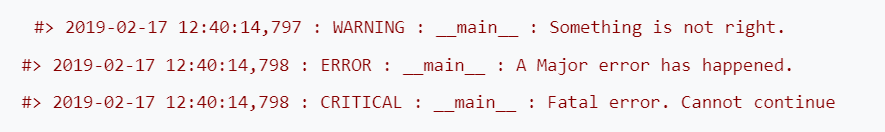

Note again, the Formatter is set on the FileHandler object and not directly on the logger. Something you may want to get used to.

# 10. Including Traceback Information in Logged Messages

Besides ‘debug‘, ‘info‘, ‘warning‘, ‘error‘, and ‘critical‘ messages, you can log exceptions that will include any associated traceback information.

With logger.exception, you can log traceback information should the code encounter any error. logger.exception will log the message provided in its arguments as well as the error message traceback info.

Below is a nice example.

In [ ]:
import logging

# Create or get the logger.

logger = logging.getLogger(__name__)  

# Set log level.

logger.setLevel(logging.INFO)

def divide(x, y):
    try:
        out = x / y
    except ZeroDivisionError:
        logger.exception("Division by zero problem")
    else:
        return out

# Logs.

logger.error("Divide {x} / {y} = {c}".format(x=10, y=0, c=divide(10,0)))

#> ERROR:__main__:Division by zero problem
#> Traceback (most recent call last):
#>   File "<ipython-input-16-a010a44fdc0a>", line 12, in divide
#>     out = x / y
#> ZeroDivisionError: division by zero
#> ERROR:__main__:None

# Practice

Basics of using the logging module to record the events in a file are very simple. For that, simply import the module from the library.  

- Create and configure the logger. It can have several parameters. But importantly, pass the name of the file in which you want to record the events.

- Here, the format of the logger can also be set. By default, the file works in append mode, but we can change that to write mode if required.

- Also, the level of the logger can be set, which acts as the threshold for tracking based on the numeric values assigned to each level. There are several attributes which can be passed as parameters.

- The list of all those parameters is given in the Python Library. The user can choose the required attribute according to the requirement. After that, create an object and use the various methods as shown in the example.

In [157]:
# Importing module.

import logging
 
# Create and configure logger.

logging.basicConfig(filename="newfile.log",
                    format='%(asctime)s %(message)s',
                    filemode='w')
 
# Creating an object.

logger = logging.getLogger()
 
# Setting the threshold of logger to DEBUG.

logger.setLevel(logging.DEBUG)
 
# Test messages.

logger.debug("Harmless debug Message")
logger.info("Just an information")
logger.warning("Its a Warning")
logger.error("Did you try to divide by zero")
logger.critical("Internet is down")

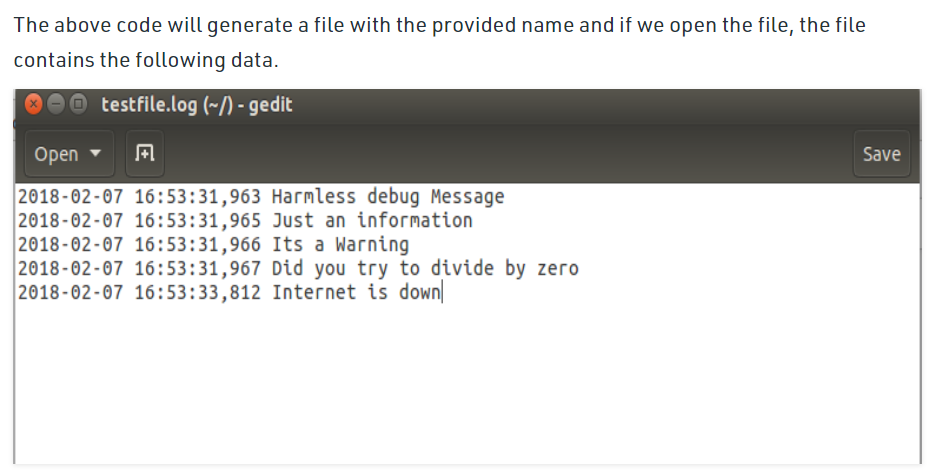

# Practice

In [ ]:
import logging 
import os 
os.mkdir("logging")
os.listdir()

['.config', 'logging', 'sample_data']

In [ ]:
os.getcwd()

'/content'

In [ ]:
os.chdir('/content/logging/')

In [ ]:
import logging as lg

In [ ]:
lg.basicConfig(filename = "test.log" , level = lg.INFO , format = '%(asctime)s %(message)s')

In [ ]:
lg.info("i am going to start my program")

In [ ]:
os.listdir()

['test.log']

In [ ]:
lg.warning("this is a first warning of my program")

In [ ]:
f = open('test.log','r')
f.read()

'2021-07-29 14:13:33,112 this is a first warning of my program\n2021-07-29 14:13:35,674 this is an error message.\n2021-07-29 14:13:37,202 this is a critical message.\n2021-07-29 14:21:20,233 Error has occured.\n2021-07-29 14:21:20,233 division by zero\nTraceback (most recent call last):\n  File "<ipython-input-19-7371b97e3cb7>", line 3, in test\n    div = a/b\nZeroDivisionError: division by zero\n2021-07-29 14:22:45,030 Error has occured.\n2021-07-29 14:22:45,035 division by zero\nTraceback (most recent call last):\n  File "<ipython-input-22-4a5fefce355f>", line 4, in test\n    div = a/b\nZeroDivisionError: division by zero\n'

In [ ]:
f.close()

In [ ]:
lg.error("this is an error message.")

In [ ]:
lg.critical("this is a critical message.")

In [ ]:
def test(a,b):
  div = a/b
  return div

In [ ]:
test(10,0)

Please check logs for more information.


In [ ]:
def test(a,b):
  try:
    lg.info(str(a)+str(b))
    div = a/b
    return div
  except Exception as e:
    print("Please check logs for more information.")
    lg.error("Error has occured.")
    lg.exception(str(e))

In [ ]:
import logging as lg
lg.basicConfig(filename = "test2.log")
def test(a,b):
  logging.info("This is the start of a function.")
  return a + b

In [ ]:
test(5,15)

20

In [ ]:
os.getcwd()

'/content/logging'

In [ ]:
os.listdir()

['test.log']

In [ ]:
os.chdir('/content/logging/')

In [ ]:
os.listdir()

['test.log']

In [ ]:
logging.shutdown()

# Questions

- Create a logger in your code
- Create one function which can take any number of inputs as an argument and it will be able to return the sum of it.
- Capture user input in the log.
- Give user instructions in the log file.
- Read a log file from python and show all the log in console.

In [ ]:
import os
import logging as lg
os.getcwd()

'/content'

In [ ]:
os.listdir()

['.config', 'new.log', 'sample_data']

In [ ]:
lg.basicConfig(filename = "new.log", level=lg.INFO)

In [ ]:
def sample(*args):
  lg.info("Start of Function")
  sum = 0
  for i in args:
    lg.info(str(i))
    lg.warning(str(i))
    sum = sum + i
  lg.info("End of Function")
  return sum

In [ ]:
sample(1,100,200,322)

623

In [ ]:
f = open("new.log","r")
print(f.read())

INFO:root:1
INFO:root:100
INFO:root:200
INFO:root:322
INFO:root:444
INFO:root:5
INFO:root:6
INFO:root:76
INFO:root:7
INFO:root:78
INFO:root:88
INFO:root:8
INFO:root:88
INFO:root:8
INFO:root:8
INFO:root:8
INFO:root:1
INFO:root:100
INFO:root:200
INFO:root:322
INFO:root:444
INFO:root:5
INFO:root:6
INFO:root:76
INFO:root:7
INFO:root:78
INFO:root:88
INFO:root:8
INFO:root:88
INFO:root:8
INFO:root:8
INFO:root:8
INFO:root:Start of Function
INFO:root:1
INFO:root:100
INFO:root:200
INFO:root:322
INFO:root:Start of Function
INFO:root:1
INFO:root:100
INFO:root:200
INFO:root:322
INFO:root:End of Function



# 11. Stream Handler

The StreamHandler call, located in the core logging package, sends logging output to stream such as sys.stdout,  sys.stderr, or any file-like object which supports the write() and flush() method.

Return a new instance of StreamHandler class. if the stream is specified, the instance will use it for logging output; otherwise sys.stderr will be used.

**Note : [These](https://www.programcreek.com/python/example/184/logging.StreamHandler) are 30 code examples for showing how to use logging.StreamHandler().**

In [1]:
import logging
import os

In [2]:
logging.basicConfig(filename = "test3.log" , level = logging.DEBUG , format = '%(asctime)s %(levelname)s %(message)s')

In [3]:
os.listdir()

['.config', 'test3.log', 'sample_data']

In [4]:
console_log = logging.StreamHandler()
console_log.setLevel(logging.INFO)

In [5]:
format = '%(asctime)s %(levelname)s %(message)s'

In [6]:
console_log.setFormatter(format)

In [7]:
logging.getLogger('').addHandler(console_log)

In [8]:
logging.info("This is my first test code for log.")

%(asctime)s %(levelname)s %(message)s


In [9]:
logger1 = logging.getLogger('logger1.area1')
logger2 = logging.getLogger('logger2.area2')

In [10]:
logger1.info("this is info for logger one")
logger2.debug("this is a debug for logger two")
logger2.info("this is a info for logger two")

%(asctime)s %(levelname)s %(message)s
%(asctime)s %(levelname)s %(message)s


In [11]:
f = open("test3.log","r")
print(f.read())

2021-07-31 06:24:30,502 INFO This is my first test code for log.
2021-07-31 06:27:47,326 INFO this is info for logger one
2021-07-31 06:27:47,329 DEBUG this is a debug for logger two
2021-07-31 06:27:47,329 INFO this is a info for logger two



In [5]:
import logging
import os

logging.basicConfig(filename = "test3.log" , level = logging.DEBUG , format = '%(asctime)s - %(name)s - %(levelname)s -  %(message)s', filemode = 'w')
console_log = logging.StreamHandler()
console_log.setLevel(logging.INFO)
format = '%(asctime)s %(name)s %(levelname)s %(message)s'
console_log.setFormatter(format)
logging.getLogger('').addHandler(console_log)
logging.info("This is my first test code for log.")
logger1 = logging.getLogger('user1')
logger2 = logging.getLogger('user2')
a = logging.getLogger('user1')
b = logging.getLogger('user2')

logger1.info("this is info for logger one")
logger2.debug("this is a debug for logger two")
logger2.info("this is a info for logger two")
a.error("this is an error for user 1")
b.critical("this is a critical error for user 2")

%(asctime)s %(name)s %(levelname)s %(message)s
%(asctime)s %(name)s %(levelname)s %(message)s
%(asctime)s %(name)s %(levelname)s %(message)s
%(asctime)s %(name)s %(levelname)s %(message)s
%(asctime)s %(name)s %(levelname)s %(message)s
%(asctime)s %(name)s %(levelname)s %(message)s
%(asctime)s %(name)s %(levelname)s %(message)s
%(asctime)s %(name)s %(levelname)s %(message)s
%(asctime)s %(name)s %(levelname)s %(message)s
%(asctime)s %(name)s %(levelname)s %(message)s
%(asctime)s %(name)s %(levelname)s %(message)s
%(asctime)s %(name)s %(levelname)s %(message)s
%(asctime)s %(name)s %(levelname)s %(message)s
%(asctime)s %(name)s %(levelname)s %(message)s
%(asctime)s %(name)s %(levelname)s %(message)s


In [6]:
f = open("test3.log","r")
print(f.read())

2021-07-31 07:18:08,289 root INFO This is my first test code for log.
2021-07-31 07:18:08,303 user1 INFO this is info for logger one
2021-07-31 07:18:08,308 user2 DEBUG this is a debug for logger two
2021-07-31 07:18:08,308 user2 INFO this is a info for logger two
2021-07-31 07:18:08,313 matplotlib.pyplot DEBUG Loaded backend module://ipykernel.pylab.backend_inline version unknown.
2021-07-31 07:23:44,925 root INFO This is my first test code for log.
2021-07-31 07:23:44,930 user1 INFO this is info for logger one
2021-07-31 07:23:44,937 user2 DEBUG this is a debug for logger two
2021-07-31 07:23:44,937 user2 INFO this is a info for logger two
2021-07-31 07:23:44,941 user1 ERROR this is an error for user 1
2021-07-31 07:23:44,946 user2 CRITICAL this is a critical error for user 2
2021-07-31 07:33:28,904 root INFO This is my first test code for log.
2021-07-31 07:33:28,918 user1 INFO this is info for logger one
2021-07-31 07:33:28,931 user2 DEBUG this is a debug for logger two
2021-07-31 

In [1]:
# Logging using Stream Handler.

import logging
import os

logging.basicConfig(filename = "test3.log" , level = logging.DEBUG , format = '%(asctime)s - %(name)s - %(levelname)s -  %(message)s')

# Create Handlers.

console_log = logging.StreamHandler()
console_log.setLevel(logging.DEBUG)
format = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
console_log.setFormatter(format)

# Create a Custom Handler.

logging.getLogger('').addHandler(console_log)
logging.info("main log")
logger1 = logging.getLogger('user1')
logger2 = logging.getLogger('user2')

logger1.info("this from user1 info")
logger2.debug("this is from user1 debug")
logger2.info("this is from user2 info")

2021-07-31 07:43:41,795 - root - INFO - main log
2021-07-31 07:43:41,806 - user1 - INFO - this from user1 info
2021-07-31 07:43:41,811 - user2 - DEBUG - this is from user1 debug
2021-07-31 07:43:41,816 - user2 - INFO - this is from user2 info
2021-07-31 07:43:41,825 - matplotlib.pyplot - DEBUG - Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [2]:
f = open("test3.log","r")
print(f.read())

2021-07-31 07:43:41,795 - root - INFO -  main log
2021-07-31 07:43:41,806 - user1 - INFO -  this from user1 info
2021-07-31 07:43:41,811 - user2 - DEBUG -  this is from user1 debug
2021-07-31 07:43:41,816 - user2 - INFO -  this is from user2 info
2021-07-31 07:43:41,825 - matplotlib.pyplot - DEBUG -  Loaded backend module://ipykernel.pylab.backend_inline version unknown.



# 12. Best Practices

## 12.1 Don’t Reinvent the Wheel

Going with print statements or even writing to files might be tempting because it’s so easy, but it comes with a price. If you don’t use a proper logging solution, you can’t enjoy all the other benefits they have. Your primitive approach might suffice for a trivial application, but it’ll give you headaches when the app starts to grow. Your logs will be full of noise and void of signal because they don’t have levels to manage granularity. And what about the flexibility to easily change log destinations? Forget it. Without handlers, you’re out of luck.

If you’re trying to learn about wheels, sure, you can reinvent the wheel. Do you want to implement a mature logging solution? Go for it! You’ll learn a lot and develop a new appreciation for the challenges involved in logging. But if this isn’t the case for you, stick to tried-and-true solutions.

## 12.2 Use the Python Standard Logging Module

Speaking of tried-and-true solutions, the first “do” on our list should be unsurprising: stick to the standard logging module. It was designed to be flexible and easy to use. As you’ve already seen, the logging module allows you to easily define handlers and formatters and use them to create powerful combinations.

## 12.3 Use the Correct Levels When Logging

It might be difficult to decide which level to assign each event. Fortunately, the Python logging module presents fewer levels than other logging libraries. This makes things easier by eliminating some potential ambiguity. When it comes to Python levels, here are the general guidelines:

- **DEBUG:** Use this level for debugging purposes in development.
- **INFO:** Use this level when something interesting—but expected—happens (e.g., a user starts a new project in a project management application).
- **WARNING:** Use this level when something unexpected or unusual happens. It’s not an error, but you should pay attention to it.
- **ERROR:** This level is for things that go wrong but are usually recoverable (e.g., internal exceptions you can handle or APIs returning error results).
- **CRITICAL:** Use this level in a doomsday scenario. The application is unusable. At this level, someone should be woken up at 2 a.m.

## 12.4 Include a Timestamp for Each Log Entry

Knowing something happened without knowing when it happened is only marginally better than not knowing about the event at all. Make sure to add a timestamp to your log entries to make the lives of the people who use logs for troubleshooting easier. Doing so also allows developers to analyze the log entries to get insights/analytics about user behavior.

## 12.5 Adopt the ISO-8601 Format for Timestamps

Timestamps are essential in log entries. Unfortunately, people can’t agree on the best way to express instants in time, so we came up with several conflicting formats. Using the format widely used in your country might look like it’s the right choice, especially if you don’t plan to offer your application overseas.

But this couldn’t be further from the truth. By simply adopting a standard format for your timestamps, you can prevent problems, as third-party libraries and tools will expect the standard format in the first place. This standard format exists, and it’s called ISO-8601. It’s an international standard for the exchange of date- and time-related data. Here’s an example of a timestamp expressed in ISO-8601 format:

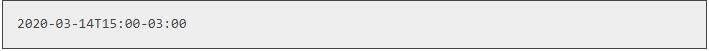

This is a basic example of how to configure the formatting to allow ISO-8601 timestamps:

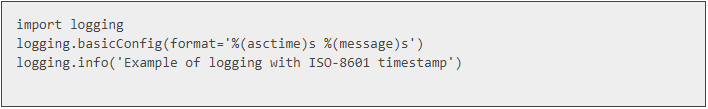

## 12.6 Use the RotatingFileHandler Class

A general logging best practice—in any language—is to use log rotation. This is a mechanism designed to automatically archive, compress, or delete old log files to prevent full disks. Fortunately, you don’t have to implement this by hand in Python. Instead, use the RotatingFileHandler class instead of the regular FileHandler one.

# 13. Conclusion

Logging in Python is often simple and well-standardized, thanks to a powerful logging framework right in the standard library.

Many times, modules should simply log everything to a logger instance for their module name. This can make it easy for the application to route log messages of different modules to different places, if necessary.

Applications then have several options to configure logging. In a modern infrastructure, though, following best practices helps simplify this a great deal. Unless specifically needed, simply logging to stdout/stderr and letting the system or your container handle log messages can be sufficient and the best approach.